<h1><center>Time Series Analysis of Telecom Data</h1></center>
<center>
Kelseyann Wright <br>
Student ID: 00565814 <br>
College of Information Technology, Western Governors University <br>
Advanced Data Analytics - D213 <br>
Instructor: Festus Elleh <br>
January 18, 2024 <br>
</center>

***

# <u>PART I: Research Question</u>

### A1: RESEARCH QUESTION <br>
The question for this analysis is: "Can time series analysis identify trends in company revenue over the last two years and forecast future revenue?"

### A2: OBJECTIVES OR GOALS <br>
The objective of this research is to use time series analysis of daily revenue data for the past two years to identify significant trends and develop a predictive model to forecast future revenue.

# <u>PART II: Method Justification</u>

### B: SUMMARY OF ASSUMPTIONS <br>

The primary assumption of time series analysis is that the data is stationary, meaning that the distribution of the data does not change over time (Datacamp, n.d.). Specifically, the mean, variance, and autocorrelation (the correlation between successive data points) must be constant over the time period of the data (Datacamp, n.d.). In addition, the errors (residuals) are assumed to be uncorrelated and normally distributed with a mean of 0 and constant variance (Hyndman and Athanasopoulos, 2018). 

# <u>PART III: Data Preparation</u>

### C1: LINE GRAPH VISUALIZATION <br>
A line graph of the dataset is provided below. 

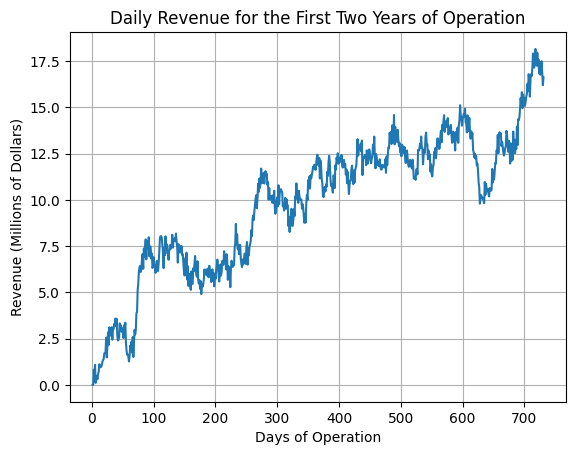

In [1]:
#set up environment
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #filter warnings out

#Load data
df = pd.read_csv("~/Desktop/WGU/D213/teleco_time_series.csv") #load data CSV

#plot line graph
plt.plot('Day', 'Revenue', data=df)
plt.xlabel('Days of Operation')
plt.ylabel('Revenue (Millions of Dollars)')
plt.title('Daily Revenue for the First Two Years of Operation')
plt.grid()
plt.show()

### C2: TIME STEP FORMATTING <br>

The dataset includes data for the first two years of operations. The time step is a day, and there are 731 data points representing 731 days which is equivalent to two years. There are no gaps in the data. <br>

In [2]:
#preview dataset
print('Data Preview:')
print(df.head(5))
print()
print(df.info(memory_usage=False))
print()
print('Dataframe Shape:', df.shape)
print("Number of Duplicates:", df.duplicated().sum()) 
print("Number of Nulls:", df.isna().sum().sum())

Data Preview:
   Day   Revenue
0    1  0.000000
1    2  0.000793
2    3  0.825542
3    4  0.320332
4    5  1.082554

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)None

Dataframe Shape: (731, 2)
Number of Duplicates: 0
Number of Nulls: 0


### C3: STATIONARITY <br>
Based on the line graph in section C1, the data has an increasing trend. This alone makes it clear that the data is not stationary. In order to statistically confirm, an augmented Dickey-Fuller test was performed using the 'adfuller' function from the 'statsmodels' library in python (Seabold and Perktold, 2010). The Dickey-Fuller test had a test statistic of -1.92 with a p-value of 0.32. Because the p-value is greater than 0.05, the null hypothesis of data stationarity was rejected, confirming that the revenue data is not stationary. In addition, the critical value of the test is more negative than the test statistic, further indicating that the data is not stationary. 

In [3]:
from statsmodels.tsa.stattools import adfuller #import library
def ad_test(dataset):
    statchk = adfuller(dataset, autolag = 'AIC') #run test for stationarity
    print('ADFuller Test Results:')
    print('1. ADF:', statchk[0])
    print('2. p-value:', statchk[1])
    print('3. Number of Lags: ', statchk[2])
    print('4. Critical Values:')
    for key, val in statchk[4].items():
        print("\t",key,": ",val)
        
ad_test(df['Revenue'])

ADFuller Test Results:
1. ADF: -1.924612157310181
2. p-value: 0.3205728150793977
3. Number of Lags:  1
4. Critical Values:
	 1% :  -3.4393520240470554
	 5% :  -2.8655128165959236
	 10% :  -2.5688855736949163


### C4: STEPS TO PREPARE THE DATA

<h5><i><u>Data Processing Step 1: Nulls, Duplicates, and Date Format</h5></i></u>
First, the data was checked for nulls and duplicates; none were found. Next, the 'Day' variable was converted to 'DateTime' format. The start date was set to 1/1/2022 in order to provide two years of data prior to today's date. The newly formatted 'Date' was then set as the index of the dataframe, and the original 'Day' column was dropped from the dataset.

In [4]:
#check for nulls and duplicates
print("Number of Duplicates:", df.duplicated().sum()) 
print("Number of Nulls:", df.isna().sum().sum())
print()

#convert day to DateTime format
import datetime
df['Date'] = (pd.date_range(start = datetime.date(2022,1,1), periods=df.shape[0], freq='24H'))

#set date as index
df_t = df.set_index('Date')
df.set_index('Date', inplace=True)

df_t.drop('Day', axis = 1, inplace=True)

#preview data
print("Transformed Data Preview:")
print(df_t.head())
print('Shape:', df_t.shape)

Number of Duplicates: 0
Number of Nulls: 0

Transformed Data Preview:
             Revenue
Date                
2022-01-01  0.000000
2022-01-02  0.000793
2022-01-03  0.825542
2022-01-04  0.320332
2022-01-05  1.082554
Shape: (731, 1)


<h5><i><u>Data Processing Step 2: Addressing Stationarity</h5></i></u>
Next, data stationarity was addressed by transforming the data using the difference method. After the difference calculations, the first row contained a 'NaN' value for revenue because there was no previous value from which to calculate a difference. Therefore, the first row was removed. The new transformed data was plotted and the Dickey-Fuller test was run again to confirm that the transformation resulted in a stationary dataset. After transformation, the Dickey-Fuller test statistic was -44.87 and the p-value was 0.0. Therefore, the null hypothesis was rejected and the transformed time series is stationary. In addition, the critical value of the test is less negative than the test statistic, and the number of lags is zero, further indicating stationarity. 

Transformed Data Preview:
             Revenue
Date                
2022-01-02  0.000793
2022-01-03  0.824749
2022-01-04 -0.505210
2022-01-05  0.762222
2022-01-06 -0.974900
Shape: (730, 1)


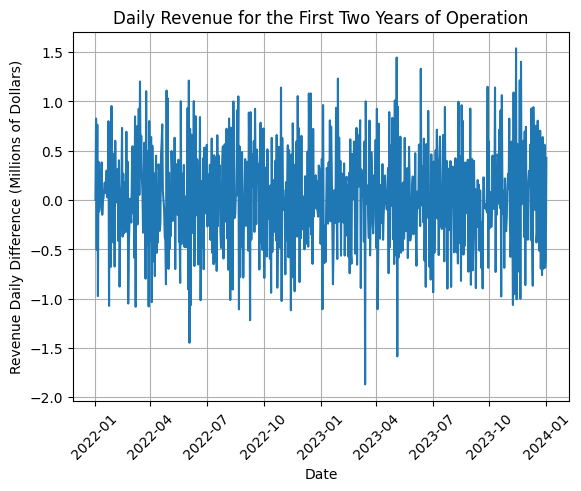

ADFuller Test Results:
1. ADF: -44.874527193875984
2. p-value: 0.0
3. Number of Lags:  0
4. Critical Values:
	 1% :  -3.4393520240470554
	 5% :  -2.8655128165959236
	 10% :  -2.5688855736949163


In [5]:
#transform data using difference
df_t['Revenue'] = df_t['Revenue'].diff()
df_t.dropna(axis=0, inplace=True)

#preview data
print("Transformed Data Preview:")
print(df_t.head())
print('Shape:', df_t.shape)

#plot transformed data
plt.plot('Revenue', data=df_t)
plt.xlabel('Date')
plt.ylabel('Revenue Daily Difference (Millions of Dollars)')
plt.title('Daily Revenue for the First Two Years of Operation')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Re-run ADFuller Test for Stationarity
ad_test(df_t['Revenue'])

<h5><i><u>Data Processing Step 3: Splitting the Dataset</h5></i></u>
The data were split into training and test sets for analysis. Because we want to use past data to predict future values, the data was split based on time with data prior to 7/31/2023 used for training, and data after that used for testing. The resulting training set was comprised of 576 values which is equal to 78.9% of the complete dataset. The test data includes 154 values which is 21.1% of the complete dataset.

In [6]:
#split the data in time
x_train = df.loc[:'2023-07-31']
x_test = df.loc['2023-08-01':]

print('x_train Shape:', x_train.shape, ', Proportion of Dataset:', round(x_train.shape[0]/df.shape[0]*100, 2), '%')
print('x_test Shape:', x_test.shape, ', Proportion of Dataset:', round(x_test.shape[0]/df.shape[0]*100, 2), '%')

x_train Shape: (577, 2) , Proportion of Dataset: 78.93 %
x_test Shape: (154, 2) , Proportion of Dataset: 21.07 %


### C5: PREPARED DATA SET <br>
The complete cleaned dataset (<i>teleco_time_series_clean_T1.csv</i>) was attached. In addition, the training dataset (<i>Xtrain_T1.csv</i>) and the test dataset (<i>Xtest_T1.csv</i>) were attached separately. 

In [7]:
#export cleaned data to CSV
x_train.to_csv("~/Desktop/WGU/D213/Xtrain_T1.csv")
x_test.to_csv("~/Desktop/WGU/D213/Xtest_T1.csv")
df_t.to_csv("~/Desktop/WGU/D213/teleco_time_series_differenced_T1.csv")
df.to_csv("~/Desktop/WGU/D213/teleco_time_series_clean_T1.csv")

# <u>PART IV: Model Identification and Analysis</u>

### D1: REPORT FINDINGS AND VISUALIZATION <br>

<h5><i><u>ACF and PACF of Original Dataset</h5></i></u>
Plots of autocorrelation and partial autocorrelation of the original (not differenced) dataset are provided below. Autocorrelation function (ACF) plots show the correlation between the time series and lagged versions of itself. The ACF plot (A) below shows a slow decay, significant for approximately 50 lags. This significance is largely due to the propogation of the autocorrelation of the first few lags, which can be visualized using a partial autocorrelation function (PACF). The PACF plot displays the autocorrelation of a time series with itself at different lags after removing the influence of previous lags. The PACF plot (B) below exhibits a spike at the first lag followed by a sharp drop off before the second lag, which is still slightly significant. The remaining lags are insignificant. This confirms that the autocorrelation for the first 50+ lags in the ACF plot is due to the propogation of the autocorrelation of the first lag, as well as some of the second lag. The gradual decline in the ACF plot (A) indicates an autogregressive (AR) process and a trend in the time series. The lack of repreated inflection points in the ACF plot also indicate a lack of seasonal patterns in the time series. Because the original time series is not stationary, as indicated by the ACF and PACF plots below and the Dickey Fuller test in section C3, ACF and PACF plots of the differenced data will need to be assessed to estimate ARIMA model terms.

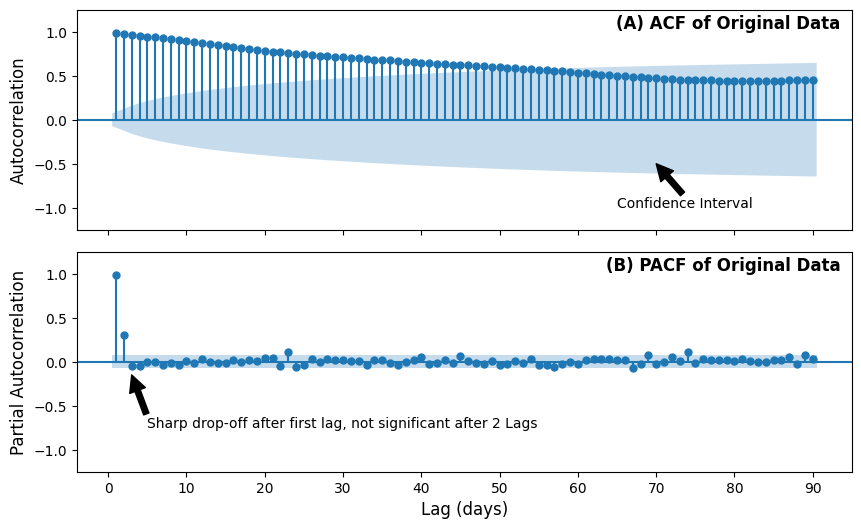

In [8]:
#ACF and PACF Figures
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axs = plt.subplots(2, sharex = True)

#ACF and PACF of original data
plot_acf(df['Revenue'], zero=False, lags=90, ax = axs[0], title='') #ACF
axs[0].set_ylim(-1.25, 1.25)
axs[0].set_ylabel('Autocorrelation', fontsize = 'large')
axs[0].set_title('(A) ACF of Original Data  ', y = 1.0, pad=-14, loc='right', fontweight='bold')
axs[0].annotate('Confidence Interval', xy=(70, -0.5), xytext=(65, -1),
            arrowprops=dict(facecolor='black'))

plot_pacf(df['Revenue'], zero=False, lags = 90, ax = axs[1], title='') #PACF
axs[1].set_ylim(-1.25, 1.25)
axs[1].set_ylabel("Partial Autocorrelation", fontsize = 'large')
axs[1].set_xlabel("Lag (days)", fontsize = 'large')
axs[1].set_title('(B) PACF of Original Data  ', y = 1.0, pad=-14, loc='right', fontweight='bold')
axs[1].annotate('Sharp drop-off after first lag, not significant after 2 Lags', xy=(3, -0.15), xytext=(5, -0.75),
            arrowprops=dict(facecolor='black'))
fig.set_size_inches(10,6)
plt.xticks(np.arange(0,95,10))
plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.show()

<h5><i><u>ACF and PACF of Differenced Dataset</h5></i></u>
ACF and PACF plots were repeated on the differenced dataset (using first differences). These plots are provided below. The ACF plot (C) below shows a negative spike at lag-1, followed by smaller significant spike at lag-2 and a rapid decline to zero, with an alternating positive/negative pattern. This confirms that the first differenced dataset is stationary with some random noise. The significant spikes in the ACF and PACF plots will be used in section D2 to define ARIMA model parameters. 

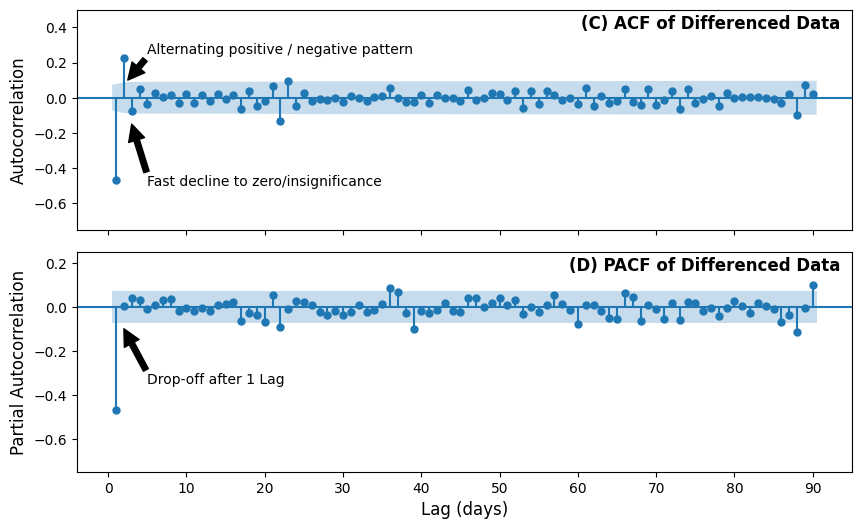

In [9]:
#ACF and PACF Figures
fig, axs = plt.subplots(2, sharex = True)

#ACF and PACF of differenced data
plot_acf(df_t['Revenue'], zero=False, lags=90, ax = axs[0], title='') #ACF
axs[0].set_ylim(-0.75, 0.5)
axs[0].set_ylabel('Autocorrelation', fontsize = 'large')
axs[0].set_title('(C) ACF of Differenced Data  ', y = 1.0, pad=-14, loc='right', fontweight='bold')
axs[0].annotate('Fast decline to zero/insignificance', xy=(3, -0.15), xytext=(5, -0.5),
            arrowprops=dict(facecolor='black'))
axs[0].annotate('Alternating positive / negative pattern', xy=(2.5, 0.1), xytext=(5, 0.25),
            arrowprops=dict(facecolor='black'))

plot_pacf(df_t['Revenue'], zero=False, lags = 90, ax = axs[1], title='') #PACF
axs[1].set_ylim(-0.75, 0.25)
axs[1].set_ylabel("Partial Autocorrelation", fontsize = 'large')
axs[1].set_xlabel("Lag (days)", fontsize = 'large')
axs[1].set_title('(D) PACF of Differenced Data  ', y = 1.0, pad=-14, loc='right', fontweight='bold')
axs[1].annotate('Drop-off after 1 Lag', xy=(2, -0.1), xytext=(5, -0.35),
            arrowprops=dict(facecolor='black'))

fig.set_size_inches(10,6)
plt.xticks(np.arange(0,95,10))
plt.subplots_adjust(wspace=0.4, hspace=0.1)
plt.show()

<h5><i><u>Decomposed Data Set, Trend, Seasonality, and Residuals</h5></i></u>
The seasonal_decompose function of the statsmodels library in python was used to decompose the differenced dataset and visualize the trend, seasonality, and residuals. Decomposing the dataset breaks it down into three parts: trend, seasonality, and residuals (or error). For the telecom time series data, an additive model was used for decomposition. This means that the time series data (figure below, A) is the sum of the trend (B), seasonality (C), and residuals (D). In the figure below, the trend plot (B) indicates that differencing successfully removed the positive trend throughout the length of the time series. The seasonality plot (C) appears to capture a weekly periodicitiy, although the scale of the seasonal change (-0.1 to 0.1) may be negligible compared to the scale of the revenue data and may be insignificant for predictions. The residual plot (D) shows that the residuals lack a trend; they are randomly distributed with a mean centered around zero. 

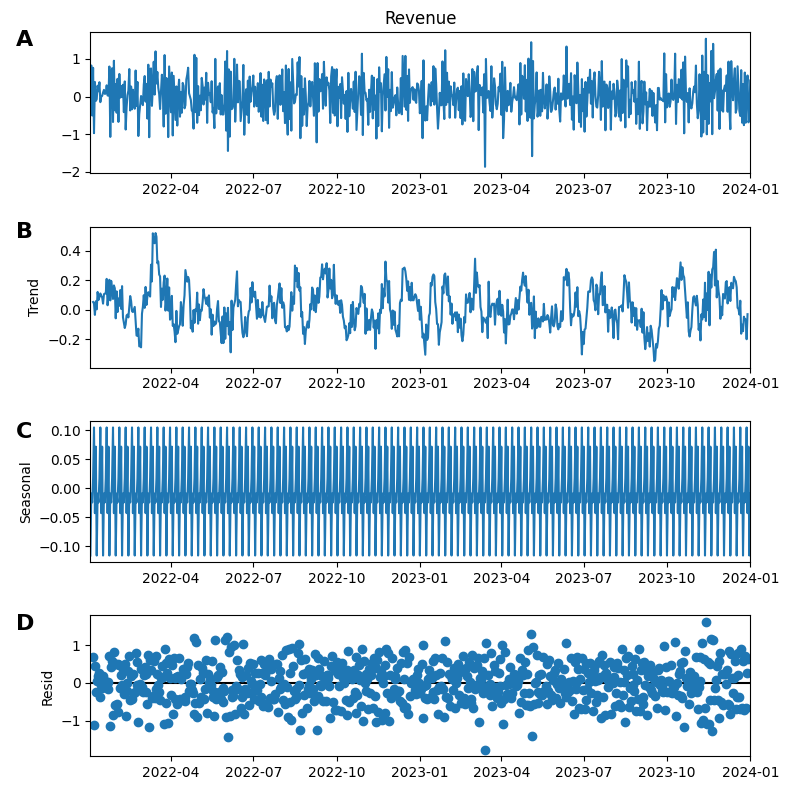

In [10]:
#decompose time series 
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_t['Revenue'])
fig = decomp.plot()
fig.set_size_inches(8,8)
fig.axes[0].annotate('A', xy=(0.02,0.93), xycoords='figure fraction', fontweight='bold', fontsize=16)
fig.axes[1].annotate('B', xy=(0.02,0.69), xycoords='figure fraction', fontweight='bold', fontsize=16)
fig.axes[2].annotate('C', xy=(0.02,0.44), xycoords='figure fraction', fontweight='bold', fontsize=16)
fig.axes[3].annotate('D', xy=(0.02,0.2), xycoords='figure fraction', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

<h5><i><u>Spectral Density</h5></i></u>
The power spectral density plot (below) confirms a lack of significant seasonality in the dataset. There are no highly distinguishable peaks to indicate periodicity in the dataset. This supports the seasonality findings from the decomposed discussed previously. 

<function matplotlib.pyplot.show(close=None, block=None)>

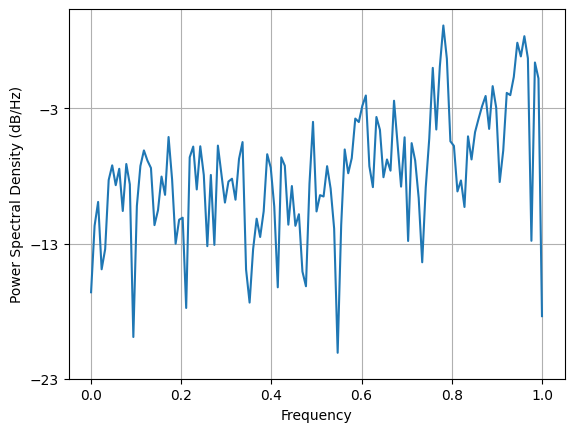

In [11]:
plt.psd(df_t['Revenue'])
plt.show

### D2: ARIMA MODEL

In order to identify ARIMA model paramters, the 'auto_arima' function from the 'pmdarima' library in python was used to estimate parameters. This function creates numerous ARIMA models and compares the alkaline information criteria (AIC) to determine the best model for the dataset. AIC measures the goodness of fit of the model, with lower AIC values corresponding to better fit. The output of the auto_arima function is provided below. The suggested ARIMA model is ARIMA(1,1,0)(0,0,0)[0]. These parameter values were then validated by comparison with ACF, PACF, seasonality, and spectral density visualisations generated in section D1.

The suggested ARIMA model according to the auto_arima function is ARIMA(1,1,0)(0,0,0)[0]. The values in the the first set of parantheses are the suggested values for p, d, and q respectively. Parameter "p" represents the order of the autoregression (AR). A value of 1 for the autogregression is consistent with the ACF and PACF plots discussed in section D1. The single spike in the PACF of the differenced data is consistent with an AR(1) model, as is the more gradual decline in the ACF of the original dataset. The ACF plot of the differenced data in section D1 had two significant spikes, indicating that a value of 2 may also be appropriate for the "p" parameter. However, looking at the auto_arima output below, the AIC value for the ARIMA(2,1,0) model is greater than the AIC for the ARIMA(1,1,0) model, indicating that a first order autogression is a better fit for the tme series. The "d" parameter is the order of differencing required for stationarity of the data. A value of 1 for the differencing order is also consistent with the augmented dickey-fuller analysis in section C3. The final digit in the first set of parentheses represents the moving average (MA) order. A value of "0" for q is consistent with the fact that the PACF plots in section D1 showed a sharp drop off rather than a more gradual decline. In contrast, the ACF plot of the original data shows a more gradual decline, which is not indicative of an MA model. 

The second set of parnetheses values, (0,0,0), as well as the final bracketed value, [0], provided by auto_arima represent the seasonality components of the time series. Having all zeros for these parameters is consistent with the seasonality discussion in section D1. Based on the decomposed data, there was some weekly seasonality but the scale of the fluctuations were negligible when compared to the overall values of the data, and therefore it makes sense that these periodic patterns would be insignificant for the model. In addition, the spectral analysis confirmed that there is not pronounced seasonality patterns in the data. Therefore, an ARIMA model without seasonality is consistent with the telecom time series. This ARIMA model, ARIMA(1,1,0), will be used to forecast future revenues in order to address the proposed research question. 

In [12]:
from pmdarima import auto_arima 

stepwise_fit = auto_arima(df['Revenue'], start_p=1, d=1, start_q=0, stepwise=True, trace = True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=1.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.836 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Sat, 27 Jan 2024   AIC                            983.122
Time:                        13:13:12   BIC                            996.901
Sample:                    01-01-2022   HQIC                           988.438
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### D3: FORECASTING USING ARIMA MODEL

The best ARIMA model identified in section D2 was ARIMA(1,1,0). The model was fit using the ARIMA function in the statsmodels library in python. The model was fit to the training dataset. Then, a model forecast for the same dates as the test dataset was generated using the get_forecast() function. A summary of the forecasted values is provided below. 

In [17]:
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

#create model using training data
model = ARIMA(x_train['Revenue'], order = (1,1,0))
mod_fit = model.fit()
forecast = mod_fit.get_forecast(len(x_test))
ypred = forecast.predicted_mean

print('Summary of Forecasted Revenue:')
print()
print('Start Date:', ypred.index[0])
print('End Date:', ypred.index[-1])
ypred.describe()

Summary of Forecasted Revenue:

Start Date: 2023-08-01 00:00:00
End Date: 2024-01-01 00:00:00


count    154.000000
mean      13.814770
std        0.011685
min       13.754996
25%       13.814199
50%       13.814199
75%       13.814199
max       13.942616
Name: predicted_mean, dtype: float64

### D4: OUTPUT AND CALCULATIONS
The model summary statistics were generated using the summary() function on the fit model. The output is provided below. All other output and calculations are provided within each section of this jupyter notebook (D213_T1.ipyb).

In [14]:
pred_train = mod_fit.get_prediction(start=x_train.index[0], end=x_train.index[-1])
ypred_train = pred_train.predicted_mean
rmse_train = np.sqrt((np.sum(np.square(np.array(x_train['Revenue']) - ypred_train)))/len(ypred_train))
rmse = np.sqrt((np.sum(np.square(np.array(x_test['Revenue']) - ypred)))/len(ypred))
print('Calculated Error Metrics: ')

print('RMSE of Training Data: ', rmse_train)
print('RMSE of Test Data: ', rmse)
print('Normalized RMSE of Training Data: ', rmse_train/(max(x_train['Revenue']) - min(x_train['Revenue'])))
print('Normalized RMSE of Test Data: ', rmse/(max(x_test['Revenue']) - min(x_test['Revenue'])))

print()
print(mod_fit.summary())

Calculated Error Metrics: 
RMSE of Training Data:  0.4688693979518765
RMSE of Test Data:  2.1174231003561013
Normalized RMSE of Training Data:  0.032148712051111854
Normalized RMSE of Test Data:  0.2533369914963433

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  577
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -381.647
Date:                Sat, 27 Jan 2024   AIC                            767.295
Time:                        13:13:12   BIC                            776.007
Sample:                    01-01-2022   HQIC                           770.692
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

### D5: CODE
All executable code is provided in the jupyter notebook file (D213_T1.ipynb). 

# <u>PART V: Data Summary and Implications</u>

### E1: RESULTS

The ARIMA model selected for the time series was ARIMA(1,1,0). The ARIMA parameters were identified using a combination of the auto_arima function in python and visualizations including ACF, PACF, data decomposition, and spectral density. A detailed discussion of model selection was provided in section D2.

The prediction interval for the forecast was one day, as our original time series has a time step of one day. The forecast length was 154 days. This forecast length was chosen to correspond with the number of days in the test dataset so that the forecast could be validated against the test data. The goal of the research question was to determine if it would be possible to predict future revenue using an ARIMA model. In order to answer this question, comparison of forecasted revenue to test (actual) data is necessary so that the model forecast performance can be evaluated. 

While determining the best ARIMA model for the time series, auto_arima uses AIC to compare models. The model with the lowest AIC was identified as the best model to use. The AIC of the model fit to the training data is 767.295. The p-value for both ARIMA terms is less than 0.05, indicating that they are significant. The RMSE was calculated for training and test data for comparison. The RMSE for the training data was 0.47, which is lower than the RMSE for the test data (2.12). This is normal, as the model was trained on the training data and we would expect the RMSE for that to be lower. Ideally, the RMSE of the training and test data would be similar. A larger RMSE for the test data indicates that there may be some variability in the test dataset that was not captured in the training data and hence was not included in the model forecast. The RMSE was normalized by dividing the RMSE by the range of the data. The normalized RMSE of the test data was 0.25. This indicates that the model is able to predict the data with relatively good accuracy. The Ljung-Box probability is 0.91, which is greater than 0.05, which confirms that the residuals randomly distributed.

### E2: ANNOTATED VISUALIZATION
The visualisation below shows the training dataset, test dataset, forecast, and forecast confidence interval. The visualization shows that our forecast is a flat line, indicating that the forecasted data does not capture the random noise in the actual data. The flat line of the forecast is just above the mean of the test data, and the test data falls within the confidence intervals of the forecast, indicating that the model is able to predict the future revenue with relatively good accuracy. 

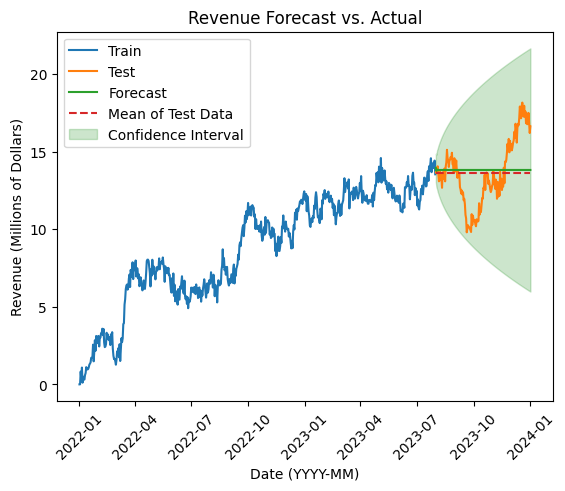

In [15]:

#forecast for length of test data
ypred_ci_lower = forecast.conf_int(alpha=0.05)['lower Revenue']
ypred_ci_upper= forecast.conf_int(alpha=0.05)['upper Revenue']

means = [x_test['Revenue'].mean()] * len(x_test)
mean_xtest = pd.DataFrame(means, index = x_test.index, columns = ['Revenue'])

#create plot
plt.plot(x_train['Revenue'], label='Train')
plt.plot(x_test['Revenue'], label ='Test')
plt.plot(ypred, label='Forecast') 
plt.plot(mean_xtest['Revenue'], label='Mean of Test Data', linestyle='dashed')
plt.fill_between(x_test.index, ypred_ci_lower, ypred_ci_upper, color='g', alpha=0.2, label="Confidence Interval")
plt.title('Revenue Forecast vs. Actual')
plt.xticks(rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Revenue (Millions of Dollars)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

### E3: RECOMMENDATION
The research question was, "Can time series analysis identify trends in company revenue over the last two years and forecast future revenue?". Based on our results, an accurate ARIMA model can be used to forecast future revenue within the 10% confidence intervals of the model. The model does not capture the random noise in the datset, but can approximate future values, at least in the short term. More historical data and additional analysis would be needed to determine the efficacy of the model for longer-term future predictions. However, the ARIMA model performance is promising and can at least provide an estimate of short term future revenue, within approximately 150 days, with good accuracy.  

# <u>PART VI: Reporting</u>

### F: REPORTING
The report is was created in Jupyter notebook using the Jupyter Notebook extension in Visual Studio Code. Both a pdf of the notebook with output (D213_T1_notebook_report.pdf) and an executable version of the notebook (D213_T1.ipynb) are attached.

### G: SOURCES OF THIRD-PARTY CODE
No sources of third party code were used. 

### H: SOURCES

Datacamp (n.d.) ARIMA Models in Python. https://app.datacamp.com/learn/courses/arima-models-in-python
<br><br>
Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts. Retrieved from https://otexts.com/fpp2/
<br><br>
Seabold, S., & Perktold, J. (2010). statsmodels: Econometric and statistical modeling with python. In 9th Python in Science Conference.
<br><br>